# **Trabalho Prático: Previsão de Incidentes Rodoviários**

## Descrição do Problema

## Preparação do programa

### Bibliotecas e Funções

In [101]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

#Modelos a usar

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor



#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

%pip install livelossplot

from livelossplot import PlotLossesKerasTF



Note: you may need to restart the kernel to use updated packages.


### Leitura dos datasets

In [102]:
dftrain = pd.read_csv('training_data.csv')
dftest = pd.read_csv('test_data.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [103]:
dftrain.shape

(5000, 13)

In [104]:
dftrain.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [105]:
dftrain.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


### Informações sobre os diferentes atributos

In [106]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [107]:
dftrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Missing Values

In [108]:
dftrain.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [109]:
dftrain.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

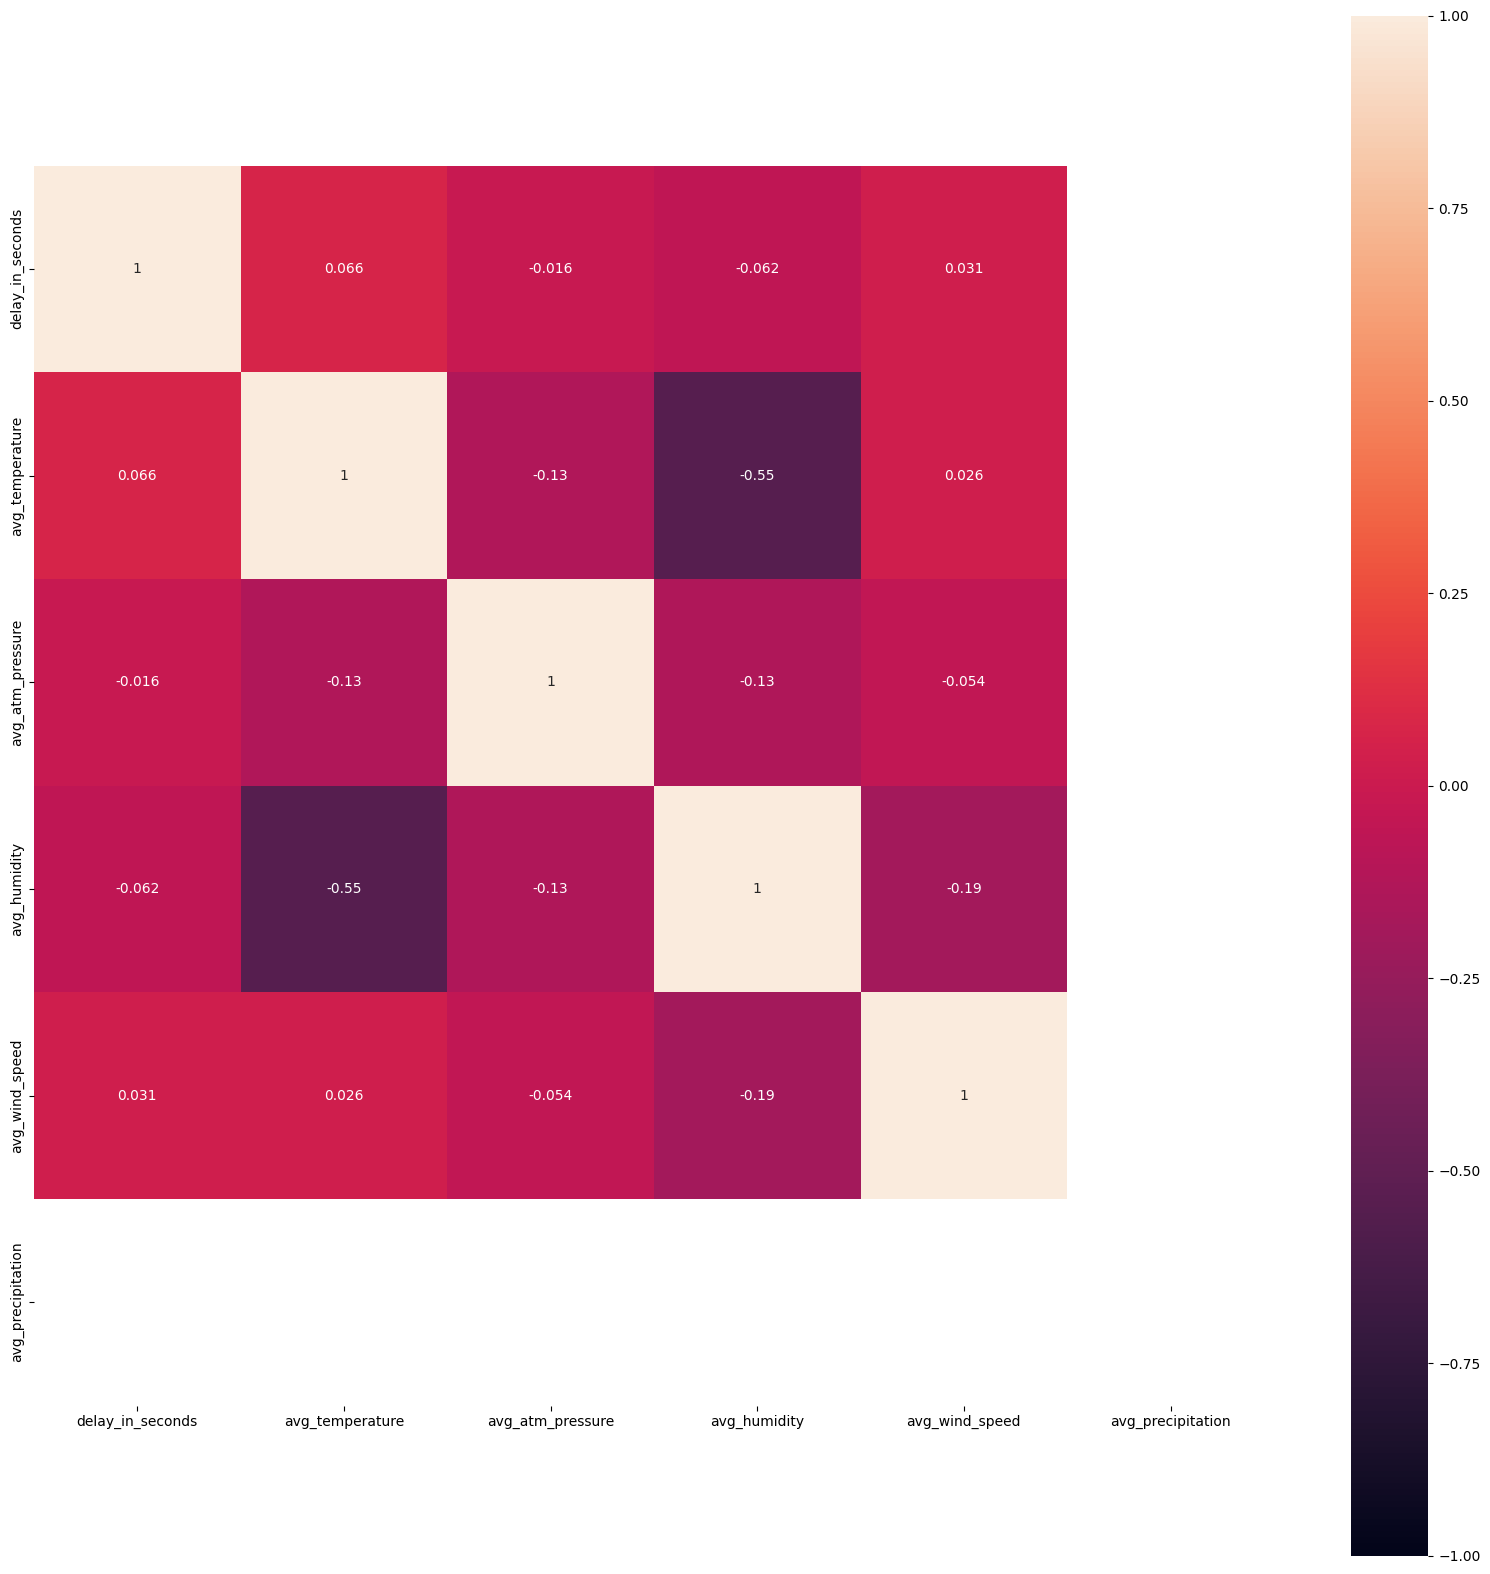

In [110]:
corr_matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Apagar atributos

In [111]:
# Era sempre Guimarães em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["city_name"], axis=1)
dftest = dftest.drop(["city_name"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["avg_precipitation"], axis=1)
dftest = dftest.drop(["avg_precipitation"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
#dftrain = dftrain.drop(["delay_in_seconds"], axis=1)
#dftest = dftest.drop(["delay_in_seconds"], axis=1)

### Alteração do tipo dos atributos

#### Label Encoding

In [112]:
label_encoder = preprocessing.LabelEncoder()

#Train
dftrain['magnitude_of_delay']= label_encoder.fit_transform(dftrain['magnitude_of_delay'])
dftrain['luminosity']= label_encoder.fit_transform(dftrain['luminosity'])
dftrain['avg_rain']= label_encoder.fit_transform(dftrain['avg_rain'])

#Test
dftest['magnitude_of_delay']= label_encoder.fit_transform(dftest['magnitude_of_delay'])
dftest['luminosity']= label_encoder.fit_transform(dftest['luminosity'])
dftest['avg_rain']= label_encoder.fit_transform(dftest['avg_rain'])

#### Atributo affected_roads

##### Quantidade de vezes que estradas aparecem

In [113]:
dftrain['affected_roads']  = dftrain['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))
dftest['affected_roads']   = dftest['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))

##### Quantidade de vezes que cada tipo de estrada aparece

#### String to Date

In [114]:
# TRAIN
dftrain['record_date'] = pd.to_datetime(dftrain['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftrain['record_month'] = dftrain['record_date'].dt.month
dftrain['record_day'] = dftrain['record_date'].dt.day
dftrain['record_hour'] = dftrain['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftrain = dftrain.drop(["record_date"], axis=1)

# TEST
dftest['record_date'] = pd.to_datetime(dftest['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftest['record_month'] = dftest['record_date'].dt.month
dftest['record_day'] = dftest['record_date'].dt.day
dftest['record_hour'] = dftest['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftest = dftest.drop(["record_date"], axis=1)

#### Tipo do atributo dependente

In [115]:
dftrain['incidents'] = pd.Categorical(dftrain['incidents'])

In [116]:
dftrain.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   magnitude_of_delay  5000 non-null   int32   
 1   delay_in_seconds    5000 non-null   int64   
 2   affected_roads      5000 non-null   int64   
 3   luminosity          5000 non-null   int32   
 4   avg_temperature     5000 non-null   float64 
 5   avg_atm_pressure    5000 non-null   float64 
 6   avg_humidity        5000 non-null   float64 
 7   avg_wind_speed      5000 non-null   float64 
 8   avg_rain            5000 non-null   int32   
 9   incidents           5000 non-null   category
 10  record_month        5000 non-null   int64   
 11  record_day          5000 non-null   int64   
 12  record_hour         5000 non-null   int64   
dtypes: category(1), float64(4), int32(3), int64(5)
memory usage: 415.4 KB


## Modelos

### Preparação prévia

#### Separação da variável dependente

In [117]:
X_train = dftrain.drop(['incidents'], axis=1)
Y_train = dftrain['incidents'].to_frame()
print(Y_train.value_counts())

incidents
None         2028
High         1073
Low           718
Very_High     603
Medium        578
dtype: int64


#### Separação entre dataframe de teste e de treino

### Treino dos modelos

#### Decision Tree

##### Descoberta dos melhores parâmetros

###### Minimo de samples para fazer um novo ramo

###### Mínimo de samples para justificar fazer uma nova folha

###### Maxima profundidade na árvore

###### Ver dps

##### Modelo final

### SVM

##### Descoberta dos melhores parâmetros

##### Modelo final

### Previsões

## Métricas de Qualidade

#### Accuracy

#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

#### Métricas por Label

#### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

#### Confusion Matrix

#### Classification Report

## Escrita no Ficheiro

Para fazer uma submissão é preciso meter o seguinte código em modo codigo e nao raw. Tambem é preciso ir a secção Separação entre dataframe de teste e de treino e fazer toggle do que é código e o que é raw

## Artificial Neural Network

### Preparação dos dados

In [118]:
print(X_train.shape)
print(X_train.info())
print(Y_train.shape)

(5000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int32  
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   int64  
 3   luminosity          5000 non-null   int32  
 4   avg_temperature     5000 non-null   float64
 5   avg_atm_pressure    5000 non-null   float64
 6   avg_humidity        5000 non-null   float64
 7   avg_wind_speed      5000 non-null   float64
 8   avg_rain            5000 non-null   int32  
 9   record_month        5000 non-null   int64  
 10  record_day          5000 non-null   int64  
 11  record_hour         5000 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 410.3 KB
None
(5000, 1)


In [119]:
#### Separação entre dataframe de teste e de treino

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=2022)

#### Definição da estrutura da rede

def build_model(activation='relu', learning_rate=0.01):
    #Create a sequential model (with three layers - last one is the output)
    model = Sequential()
    model.add(Dense(16, input_dim=12, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(5, activation='relu'))
    
    #Compile the model
    
    #Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = 'mae',
        optimizer = tf.keras.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

### Construção da rede

model = build_model()
model.summary()

#### Utilização de GridSearch para descobrir os melhores parâmetros

TUNING_DICT = {
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.01, 0.001],
}

# Creacao de um regressor de keras 

kf = KFold(n_splits=5, shuffle=True, random_state=2022)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                           param_grid=TUNING_DICT,
                           scoring = 'neg_mean_absolute_error',
                           refit = True,
                           verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2)

#### Resultados do GridSearch

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#### Melhor estimador

best_mlp_model = grid_search.best_estimator_

#### Predição

best_mlp_model.fit(X_train, y_train, epochs=20, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()],verbose=1)

#### Obter os resultados

predictions = best_mlp_model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0],1)
predictions[:5]

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 16)                208       
                                                                 
 dense_331 (Dense)           (None, 8)                 136       
                                                                 
 dense_332 (Dense)           (None, 5)                 45        
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20


c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\utils\traceback_utils.py", line 67

UnimplementedError: Graph execution error:

Detected at node 'mean_absolute_error/Cast' defined at (most recent call last):
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\vasco\AppData\Local\Temp\ipykernel_14396\3249514933.py", line 46, in <module>
      grid_search.fit(X_train, y_train, validation_split=0.2)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\sklearn\model_selection\_search.py", line 926, in fit
      self.best_estimator_.fit(X, y, **fit_params)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
      history = self.model.fit(x, y, **fit_args)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\training.py", line 949, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\vasco\anaconda3\envs\old_python37\lib\site-packages\keras\losses.py", line 1454, in mean_absolute_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_absolute_error/Cast'
Cast string to float is not supported
	 [[{{node mean_absolute_error/Cast}}]] [Op:__inference_train_function_42883]